In [2]:
from astropy.io import fits, ascii
from astropy.table import Table, Column, hstack, vstack
from photutils import CircularAperture, CircularAnnulus
import pdb, glob
import numpy as np
import rafias_lib as rl
import matplotlib.pyplot as plt
%matplotlib inline

# General

In [3]:
files_sub1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_481_SE_*/*.slp.fits'))
len(files_sub1)

306

In [3]:
files_sub2 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB-60*_1_489_SE_*/*.slp.fits'))[:306]
len(files_sub2)

306

In [4]:
centers_sub1 = rl.gen_center_g2d(166, 160, 5, 400, 2, 2, 0, files_sub1)

In [5]:
centers_sub2 = rl.gen_center_g2d(162,156,5,500,2,2,0, files_sub2)

In [6]:
files_sub6401 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_481_SE_*/*.slp.fits'))
len(files_sub6401)

60

In [7]:
files_sub6402 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM'
                              '/NRCN821WLP8SUB640-60*_1_489_SE_*/*.slp.fits'))
len(files_sub6402)

60

In [8]:
centers_sub6401 = rl.gen_center_g2d(326,320,5,400,2,2,0,files_sub6401)

In [9]:
centers_sub6402 = rl.gen_center_g2d(319,316,5,500,2,2,0,files_sub6402)

In [10]:
files_full1 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL1-*_1_481_SE_*/*.red.fits'))
len(files_full1)

225

In [11]:
files_full2 = np.sort(glob.glob('/data1/tso_analysis/all_tso_cv3/raw_separated_MMM/'
                              'NRCN821WLP8FULL1-*_1_489_SE_*/*.red.fits'))
len(files_full2)

225

In [12]:
centers_full1 = rl.gen_center_g2d(1405,1036,5,400,4,4,0, files_full1, red = True)

In [13]:
centers_full2 = rl.gen_center_g2d(828,821,5,600,4,4,0, files_full2, red = True)

# Light Curve

In [14]:
sub_ts1 = rl.time_series(centers_sub1[1], centers_sub1[2], files_sub1, 72, 80, 82)
sub_ts2 = rl.time_series(centers_sub2[1], centers_sub2[2], files_sub2, 72, 80, 82)
sub_av = (sub_ts1['res_flux'] + sub_ts2['res_flux'])/2.

In [15]:
sub640_ts1 = rl.time_series(centers_sub6401[1], centers_sub6401[2], files_sub6401, 46, 58, 62)
sub640_ts2 = rl.time_series(centers_sub6402[1], centers_sub6402[2], files_sub6402, 46, 58, 62)
sub640_av = (sub640_ts1['res_flux'] + sub640_ts2['res_flux'])/2.

In [16]:
full_ts1 = rl.time_series(centers_full1[1], centers_full1[2], files_full1, 68, 72, 76)
full_ts2 = rl.time_series(centers_full2[1], centers_full2[2], files_full2, 68, 72, 76)
full_av = (full_ts1['res_flux'] + full_ts2['res_flux'])/2.

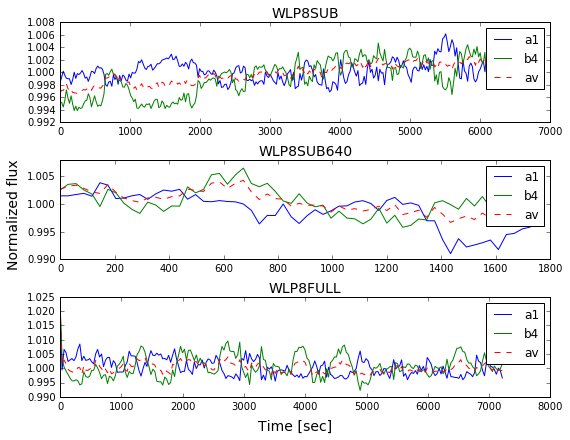

In [34]:
fig, ax = plt.subplots(nrows = 3, figsize = (8, 6))
ax[0].plot(sub_ts1['time'], sub_ts1['res_flux']/np.median(sub_ts1['res_flux']), 'b-', label = 'a1')
ax[0].plot(sub_ts2['time'], sub_ts2['res_flux']/np.median(sub_ts2['res_flux']), 'g-', label = 'b4')
ax[0].plot(sub_ts1['time'], sub_av/np.median(sub_av), 'r--', label = 'av')
ax[1].plot(sub640_ts1['time'], sub640_ts1['res_flux']/np.median(sub640_ts1['res_flux']), 'b-', label = 'a1')
ax[1].plot(sub640_ts2['time'], sub640_ts2['res_flux']/np.median(sub640_ts2['res_flux']), 'g-', label = 'b4')
ax[1].plot(sub640_ts1['time'], sub640_av/np.median(sub640_av), 'r--', label = 'av')
ax[2].plot(full_ts1['time'], full_ts1['res_flux']/np.median(full_ts1['res_flux']), 'b-', label = 'a1')
ax[2].plot(full_ts2['time'], full_ts2['res_flux']/np.median(full_ts2['res_flux']), 'g-', label = 'b4')
ax[2].plot(full_ts1['time'], full_av/np.median(full_av), 'r--', label = 'av')
fig.tight_layout(pad=2.0, w_pad=2.0, h_pad=2.0)
ax[0].set_title('WLP8SUB', fontsize = 14)
ax[1].set_title('WLP8SUB640', fontsize = 14)
ax[2].set_title('WLP8FULL', fontsize = 14)
ax[0].legend(bbox_to_anchor = (1,1))
ax[1].legend(bbox_to_anchor = (1,1))
ax[2].legend(bbox_to_anchor = (1,1))
fig.text(0.5, 0.00001, 'Time [sec]', ha='center', fontsize = 14)
fig.text(0.00001, 0.5, 'Normalized flux', va='center', rotation = 'vertical', fontsize = 14)

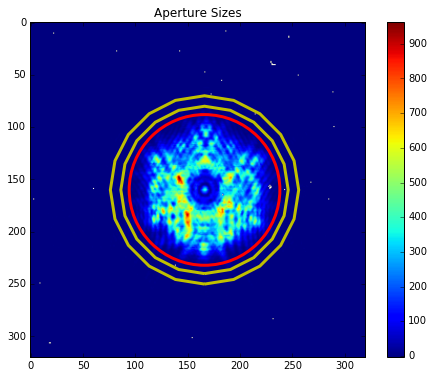

In [4]:
plt.figure(figsize=(8, 6))
image = rl.test_image(files_sub1[5])[0]
ap_src = CircularAperture((166, 160), r = 72)
ap_bkg = CircularAnnulus((166, 160), r_in = 80, r_out = 90)
im = plt.imshow(image)
plt.colorbar(im)
ap_src.plot(linewidth = 3, color = 'r')
ap_bkg.plot(linewidth = 3, color = 'y')
plt.title('Aperture Sizes')

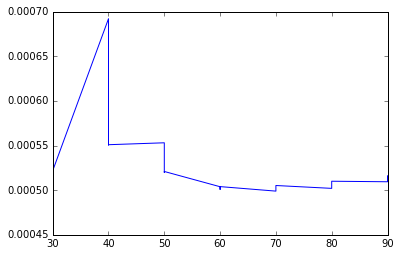

In [56]:
rt = ascii.read('rt_sub.csv')
plt.plot(rt['r_source'], rt['norm_stdev'])

In [16]:
bkg = Table(ascii.read('bkg_comparison.tex'))
bkg

Test,Median Sub (Circ),Median Sub (CIS),Average Sub (Circ),Average Sub (CIS),Robust Average (Circ),Robust Average (CIS),Astropy CircAnn,Result
str6,int64,int64,int64,int64,int64,int64,int64,str21
SUB,514,500,497,499,507,500,499,Average Sub (Circ)
SUB640,1208,1210,1205,1199,1192,1215,1197,Robust Average (Circ)
FULL1,1296,1342,1287,1333,1295,1338,1288,Average Sub (Circ)
FULL2,1590,1611,1582,1617,1588,1613,1576,Astropy CircAnn
FULL3,1058,1075,1024,1065,1036,1066,1026,Average Sub (Circ)
FULL4,1115,1161,1106,1152,1114,1149,1106,Astropy CircAnn
FULL5,864,913,845,892,850,899,853,Average Sub (Circ)


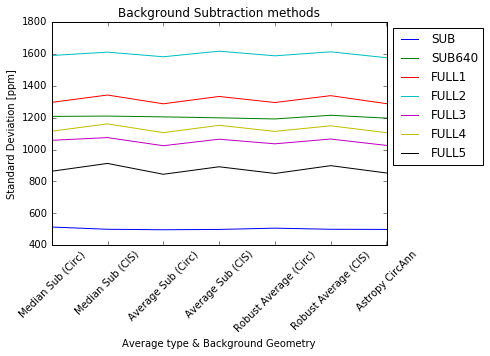

In [55]:
for i in range(7):
    plt.plot(list(bkg[i])[1:8], label = bkg[i][0])
plt.legend(loc = 'best', bbox_to_anchor = (1,1))
plt.xlabel('Average type & Background Geometry')
plt.ylabel('Standard Deviation [ppm]')
plt.xticks(range(7), bkg.colnames[1:8], rotation = 45)
plt.title('Background Subtraction methods')

In [60]:
sub1 = rl.time_series([166]*306, [160]*306, files_sub1, 72, 80, 82)
sub2 = rl.time_series([162]*306, [156]*306, files_sub2, 72, 80, 82)
det1 = rl.linear_bestfit(sub1['time'], sub1['res_flux'], 0.00002, 1)
det2 = rl.linear_bestfit(sub2['time'], sub2['res_flux'], 0.00002, 1)
det_av = (det1 + det2)/2.
np.std(det_av)

0.00049420274816349438